# scikit-image API-Feature

In [1]:
from skimage import data
import skimage.color as color
import skimage.feature as feature
import numpy as np
%matplotlib  inline
import matplotlib.pyplot as plt

# 1.Canny边缘检测

Text(0.5,1,'Canny with Sigma=3')

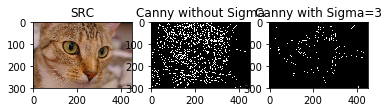

In [2]:
img = data.chelsea()
img_gray = color.rgb2gray(img)
edge1 = feature.canny(img_gray)
edge2 = feature.canny(img_gray,sigma=3)
plt.subplot(131)
plt.imshow(img)
plt.title('SRC')
plt.subplot(132)
plt.imshow(edge1,'gray')
plt.title('Canny without Sigma')
plt.subplot(133)
plt.imshow(edge2,'gray')
plt.title('Canny with Sigma=3')

# 2.DAISY特征提取

In [5]:
descs_img = feature.daisy(img_gray,visualize = False)

TypeError: Invalid dimensions for image data

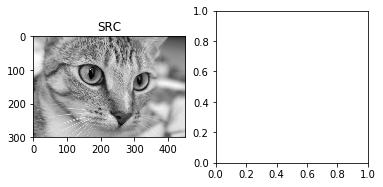

In [6]:
plt.subplot(121)
plt.imshow(img_gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(np.uint8(np.abs(descs_img*255)),'gray')
plt.title('DAISY Feature')

# 3.HOG特征提取

In [7]:
out,hog_image = feature.hog(img_gray,visualize = True)

c:\programdata\anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Text(0.5,1,'DAISY Feature')

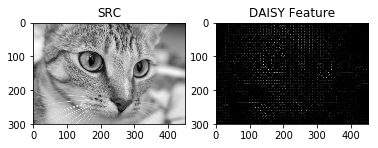

In [8]:
plt.subplot(121)
plt.imshow(img_gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(np.uint8(np.abs(hog_image*255)),'gray')
plt.title('DAISY Feature')

# 4.计算灰度共生矩阵

可以参考
[1].https://blog.csdn.net/panda1234lee/article/details/71405880

In [9]:
result = feature.greycomatrix(np.int64(img_gray),[1],
                              [0, np.pi/4, np.pi/2, 3*np.pi/4],levels=4)

# 5.计算灰度共生矩阵的纹理属性

In [11]:
out = feature.greycoprops(result)

In [12]:
print(out)

[[0 0 0 0]]


# 6.Local Binary Pattern(LBP)

In [13]:
result = feature.local_binary_pattern(img_gray,5,7)

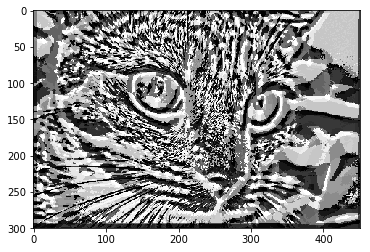

In [14]:
plt.imshow(result,'gray')

# 7.Multi Block LBP

In [15]:
result = feature.multiblock_lbp(img_gray,64,64,9,9)

In [16]:
print(result)

234


In [20]:
rows,cols = img_gray.shape
res = feature.draw_multiblock_lbp(img_gray,0,0,cols,rows)

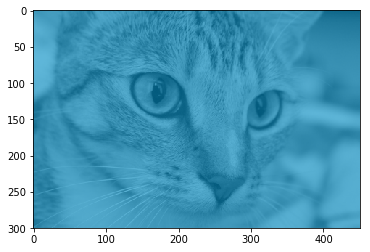

In [21]:
plt.imshow(res,'gray')

## 8. Peak Local Max

In [26]:
dst = feature.peak_local_max(img_gray)
print(dst.shape)

(6370, 2)


In [27]:
dst = feature.peak_local_max(img_gray,min_distance=2)
print(dst)

[[297 419]
 [297 296]
 [297 268]
 ...
 [  2 240]
 [  2 204]
 [  2 183]]


In [28]:
indices = feature.peak_local_max(img_gray,min_distance=2,indices=True)
print(indices)

[[297 419]
 [297 296]
 [297 268]
 ...
 [  2 240]
 [  2 204]
 [  2 183]]


## 9.张量结构

参考：
[1].https://www.cnblogs.com/tiandsp/archive/2013/09/07/3307378.html

In [29]:
Axx, Axy, Ayy = feature.structure_tensor(img_gray, sigma=0.1)

Text(0.5,1,'Axx')

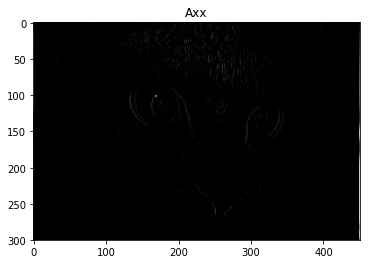

In [32]:
plt.imshow(Axx,'gray')
plt.title('Axx')

Text(0.5,1,'Axy')

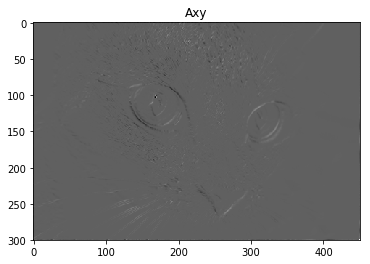

In [33]:
plt.imshow(Axy,'gray')
plt.title('Axy')

Text(0.5,1,'Ayy')

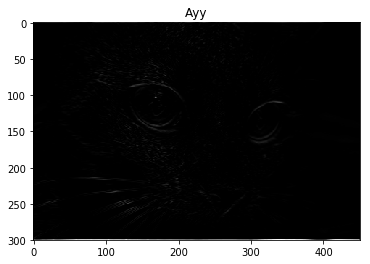

In [34]:
plt.imshow(Ayy,'gray')
plt.title('Ayy')

### 9.1结构张量特征值

In [35]:
I1,I2 = feature.structure_tensor_eigvals(Axx, Axy, Ayy)

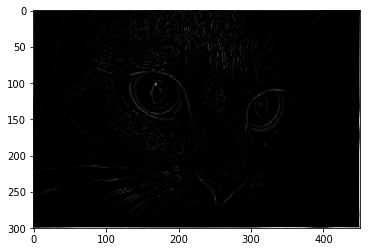

In [37]:
plt.imshow(I1,'gray')

In [39]:
print(I2)

[[ 4.44089210e-16 -2.22044605e-16  0.00000000e+00 ...  1.38777878e-17
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -5.42101086e-20
   0.00000000e+00  1.38777878e-17]
 [-4.44089210e-16  8.67361738e-19  0.00000000e+00 ...  1.08420217e-19
  -2.16840434e-19  0.00000000e+00]
 ...
 [ 0.00000000e+00 -5.55111512e-17  2.77555756e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00 -8.67361738e-19 ... -1.73472348e-18
   0.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  2.22044605e-16 -2.22044605e-16 ... -4.44089210e-16
   0.00000000e+00  0.00000000e+00]]


## 10.海森矩阵(Hessian Matrix)

In [42]:
Hrr,Hrc,Hcc = feature.hessian_matrix(img_gray,order='xy')

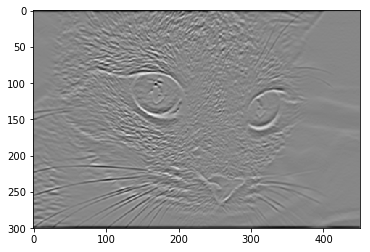

In [43]:
plt.imshow(Hrr,'gray')

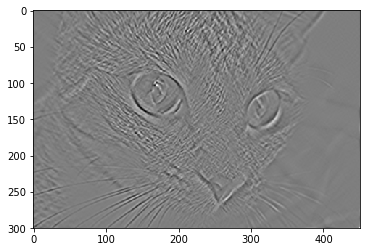

In [44]:
plt.imshow(Hrc,'gray')

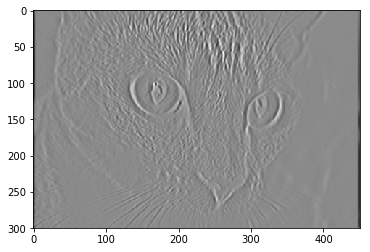

In [45]:
plt.imshow(Hcc,'gray')

## 11.计算Kitchen和Rosenfeld角点响应图像

In [46]:
dst = feature.corner_kitchen_rosenfeld(img_gray)

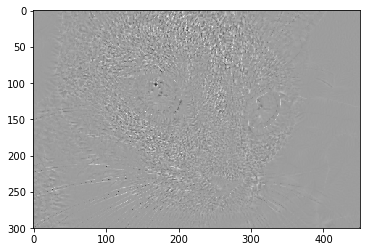

In [47]:
plt.imshow(dst,'gray')

## 12.Harris角点

In [48]:
dst = feature.corner_harris(img_gray)

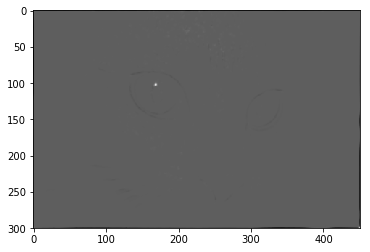

In [50]:
plt.imshow(dst,'gray')

In [51]:
# 计算角点坐标
dst = feature.corner_peaks(dst,min_distance=1)
print(dst)

[[  1   1]
 [  1 166]
 [  1 205]
 [  1 229]
 [102 169]
 [298 449]]


## 13.Shi-Tomasi (Kanade-Tomasi)角点

In [52]:
dst = feature.corner_shi_tomasi(img_gray)

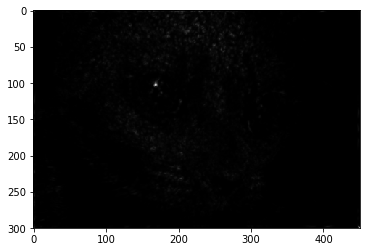

In [53]:
plt.imshow(dst,'gray')

In [55]:
coords = feature.corner_peaks(dst)

## 14.Foerstner角点

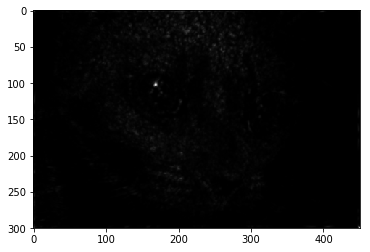

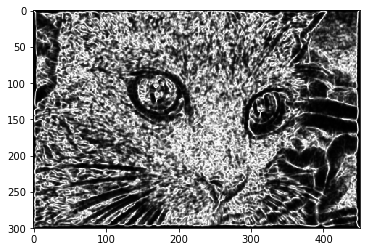

In [57]:
w,q = feature.corner_foerstner(img_gray)
# coords = feature.corner_peaks(dst)
plt.figure()
plt.imshow(w,'gray')
plt.figure()
plt.imshow(q,'gray')

## 15.角点亚像素位置

In [59]:
coords = feature.corner_peaks(feature.corner_harris(img_gray), min_distance=2)
coords_subpixes = feature.corner_subpix(img_gray,coords)

In [60]:
print(coords_subpixes)

[[nan nan]]


## 16.Moravec角点

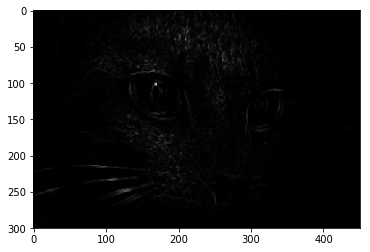

In [61]:
dst = feature.corner_moravec(img_gray)
plt.imshow(dst,'gray')

## 17.FAST角点

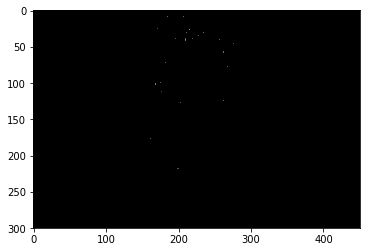

In [62]:
dst = feature.corner_fast(img_gray)
plt.imshow(dst,'gray')

## 18.角点方向

In [64]:
from skimage.morphology import octagon
corners = feature.corner_peaks(feature.corner_fast(img_gray, 9), min_distance=1)
orientations = feature.corner_orientations(img_gray, corners, octagon(3, 2))
print(orientations)

[-0.15502237 -0.6640986  -1.6531867   1.55476525  2.96127307  2.72574055
  1.21341446  2.51820215  1.38664451 -1.36437623  1.49735426  2.8668768
  1.91590104 -0.40633004 -3.12152746 -1.92795991  1.62720279 -0.47484373
  0.38546883 -0.83579563  2.61627792  1.10696888  0.60469031 -1.04957747
  0.74037926  1.63829341  1.47986689 -1.33029634  1.67850769 -1.72751973
  3.09353884 -2.85558019 -2.34253366 -0.6187626  -1.07104616  2.85490983
 -0.64259311 -0.20689586 -1.77335096  1.9870292  -2.44274495  0.05486074
  1.35581885 -1.38545217  2.59924498  2.86853914  2.97263771  2.66292842
 -0.0031607   1.68369697  1.97612526 -0.26363088  1.76313628  1.08946089
  2.17299899 -1.4629172  -0.60367597  2.91153278 -0.87653441 -1.79428843
 -1.13221852 -0.71533304  2.51208376  0.19914112  1.00337619  2.0306034
  2.2246876  -1.61692301 -1.68868667 -0.96498613  2.55277778 -0.60925093
 -1.64427643  2.23525192  1.32203058  0.1676054   1.07862928  1.94433509
 -2.77170451  0.4938637   0.01071088  0.21236173  1.6